# Week-08

In [ ]:
# getwd() #ディレクトリ確認getwd() #ディレクトリ確認

In [ ]:
# # setwd() に入れる Path は上記のディレクトリの下の data ファイル
# setwd("C:/Users/iiats/OneDrive/デスクトップ/１００本ノックチャレンジ/03_R_100_knocks/Questions/data")
# getwd() #ディレクトリ確認

In [ ]:
# DataFrameの準備
# 相対パスでデータを読み込む
df <- read.csv("./data/titanic3.csv", header=T)
df2 <- read.csv("./data/data1.csv", header=T)
df3 <- read.csv("./data/data1_2.csv", header=T)
df4 <- read.csv("./data/data1_3.csv", header=T)
df5 <- read.csv("./data/data2.csv", header=T, fileEncoding = "CP932")

# 統計 (66 - 79)

In [ ]:
# 【71】
# df2においてclassでグルーピングし、クラスごとの科目の
# 最大値、最小値、平均値を求める(name列は削除しておく)

# 手を抜いて summary() を使用
summary(df2)

      name       class        English        Mathmatics        History    
 B      :2   Min.   :1.0   Min.   : 40.0   Min.   : 52.00   Min.   :52.0  
 D      :2   1st Qu.:1.0   1st Qu.: 55.0   1st Qu.: 63.00   1st Qu.:70.0  
 A      :1   Median :1.0   Median : 69.0   Median : 69.00   Median :80.0  
 C      :1   Mean   :1.4   Mean   : 67.7   Mean   : 73.80   Mean   :77.4  
 E      :1   3rd Qu.:2.0   3rd Qu.: 79.0   3rd Qu.: 84.25   3rd Qu.:83.0  
 F      :1   Max.   :2.0   Max.   :100.0   Max.   :100.00   Max.   :96.0  
 (Other):2                                                                

In [ ]:
# 【72】
# dfの基本統計量を確認(describe)

summary(df2)

      name       class        English        Mathmatics        History    
 B      :2   Min.   :1.0   Min.   : 40.0   Min.   : 52.00   Min.   :52.0  
 D      :2   1st Qu.:1.0   1st Qu.: 55.0   1st Qu.: 63.00   1st Qu.:70.0  
 A      :1   Median :1.0   Median : 69.0   Median : 69.00   Median :80.0  
 C      :1   Mean   :1.4   Mean   : 67.7   Mean   : 73.80   Mean   :77.4  
 E      :1   3rd Qu.:2.0   3rd Qu.: 79.0   3rd Qu.: 84.25   3rd Qu.:83.0  
 F      :1   Max.   :2.0   Max.   :100.0   Max.   :100.00   Max.   :96.0  
 (Other):2                                                                

In [ ]:
# 【73】
# dfの各列間の(Pearson)相関係数を確認

head(df)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [ ]:
df_tmp <- df[, c(-3, -4, -8, -10, -11, -12, -13, -14)]
head(df_tmp)

pclass,survived,age,sibsp,parch,fare
1,1,29.00,0,0,211.3375
1,1,0.92,1,2,151.5500
1,0,2.00,1,2,151.5500
1,0,30.00,1,2,151.5500
1,0,25.00,1,2,151.5500
1,1,48.00,0,0,26.5500


In [ ]:
# 欠損値確認
# install.packages("naniar") # 欠損値処理
library(naniar) # 欠損値処理

n_miss(df_tmp) # 欠損値の数
n_complete(df_tmp) # 欠損値でない数
prop_miss(df_tmp) # 欠損値の割合
miss_var_summary(df_tmp)

Warning message:
"package 'naniar' was built under R version 3.6.3"

[1] 264

[1] 7590

[1] 0.03361345

variable,n_miss,pct_miss
age,263,20.09167303
fare,1,0.07639419
pclass,0,0.00000000
survived,0,0.00000000
sibsp,0,0.00000000
parch,0,0.00000000


In [ ]:
# 欠損値がある行を削除
df_tmp<- na.omit(df_tmp)
miss_var_summary(df_tmp)

variable,n_miss,pct_miss
pclass,0,0
survived,0,0
age,0,0
sibsp,0,0
parch,0,0
fare,0,0


In [ ]:
str(df_tmp)

'data.frame':	1045 obs. of  6 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ age     : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ fare    : num  211 152 152 152 152 ...
 - attr(*, "na.action")= 'omit' Named int  16 38 41 47 60 70 71 75 81 107 ...
  ..- attr(*, "names")= chr  "16" "38" "41" "47" ...


In [ ]:
x <- cor(df_tmp); x

,pclass,survived,age,sibsp,parch,fare
pclass,1.00000000,-0.31997900,-0.41108638,0.04774605,0.01768544,-0.5652554
survived,-0.31997900,1.00000000,-0.05395716,-0.01265744,0.11409110,0.2491636
age,-0.41108638,-0.05395716,1.00000000,-0.24313861,-0.15024090,0.1787399
sibsp,0.04774605,-0.01265744,-0.24313861,1.00000000,0.37429099,0.1411838
parch,0.01768544,0.11409110,-0.15024090,0.37429099,1.00000000,0.2167232
fare,-0.56525541,0.24916365,0.17873986,0.14118377,0.21672322,1.0000000


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


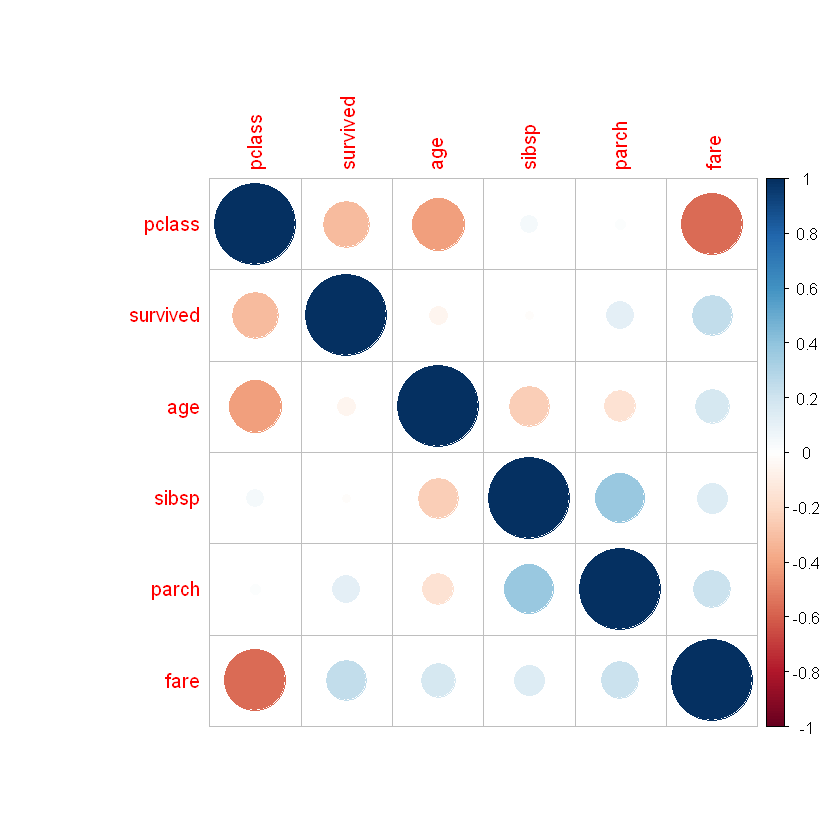

In [ ]:
# おまけ：相関行列のヒートマップ
# install.packages("corrplot")
library(corrplot)
corrplot(x)

In [ ]:
# 【74】
# scikit-learnを用いてdf2のEnglish、Mathmatics、History列を標準化する

### 標準化とは  
与えられたデータを平均が0で分散が1のデータに変換する操作のこと  
各データ xi から平均 μ を引き，その値を標準偏差 σ で割ることで達成される  
zi=(xi-μ)/σ

In [ ]:
head(df2)

name,class,English,Mathmatics,History
A,1,80,55,65
B,1,55,100,83
C,2,65,70,95
D,1,40,63,70
E,2,76,82,79
F,2,93,68,81


In [ ]:
df2_tmp <- df2[, c(-1, -2)]
head(df2_tmp)

English,Mathmatics,History
80,55,65
55,100,83
65,70,95
40,63,70
76,82,79
93,68,81


In [ ]:
# https://qiita.com/Dixhom/items/aab402ac877f47391d28
df2_scale = scale(df2_tmp); df2_scale

English,Mathmatics,History
0.5989045,-1.0903565,-0.9179171
-0.6183810,1.5195394,0.4145432
-0.1314668,-0.2203912,1.3028501
-1.3487523,-0.6263750,-0.5477893
0.4041388,0.4755810,0.1184409
1.2318929,-0.3363866,0.2664921
1.5727328,0.6495741,-1.8802496
0.2580645,-1.2643495,1.3768757
-0.6183810,1.5195394,0.4145432
-1.3487523,-0.6263750,-0.5477893


In [ ]:
summary(df2_scale)

    English          Mathmatics         History       
 Min.   :-1.3488   Min.   :-1.2643   Min.   :-1.8802  
 1st Qu.:-0.6184   1st Qu.:-0.6264   1st Qu.:-0.5478  
 Median : 0.0633   Median :-0.2784   Median : 0.1925  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.5502   3rd Qu.: 0.6061   3rd Qu.: 0.4145  
 Max.   : 1.5727   Max.   : 1.5195   Max.   : 1.3769  

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

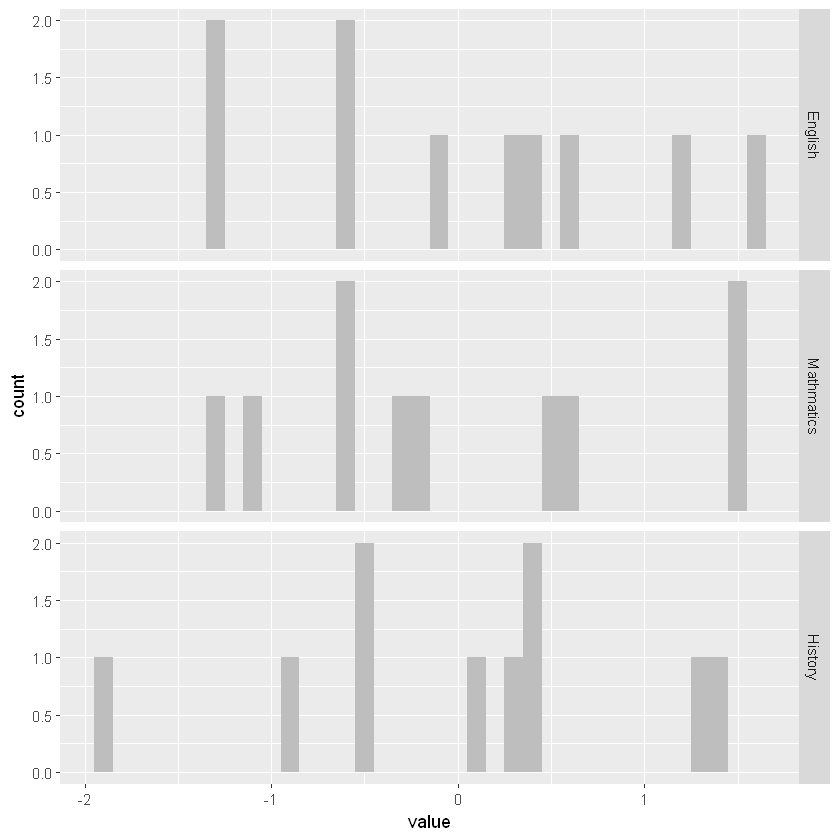

In [ ]:
# install.packages("ggplot2")
# install.packages("reshape2") # 追加
library(ggplot2)
library(reshape2)

ggplot(melt(df2_scale), aes(x=value)) +
    geom_histogram(fill="gray", binwidth=0.1) +
    facet_grid(Var2~., scales="free")

In [ ]:
# 【75】
# scikit-learnを用いてdf2のEnglish列を標準化する
# (from sklearn.preprocessing import StandardScalerをインポート)

df2_scale = scale(df2$English); df2_scale

0.5989045
-0.6183810
-0.1314668
-1.3487523
0.4041388
1.2318929
1.5727328
0.2580645
-0.6183810
-1.3487523


In [ ]:
# 【76】
# scikit-learnを用いてdf2のEnglish、Mathmatics、History列を
# Min-Maxスケーリングする
# (from sklearn.preprocessing import StandardScalerをインポート)

In [ ]:
df2_tmp[1]

English
80
55
65
40
76
93
100
73
55
40


In [ ]:
# https://webbeginner.hatenablog.com/entry/2014/09/29/232656

df2_scale <- df2_tmp

for (i in 1:3) {
    #最小値
    df2_min <- min(df2_tmp[i])
    #最大値
    df2_max <- max(df2_tmp[i])
    # Min-Maxスケーリング
    df2_scale[i] <- scale(df2_tmp[i], center=df2_min, scale=(df2_max - df2_min))
    }
df2_scale

English,Mathmatics,History
0.6666667,0.0625000,0.2954545
0.2500000,1.0000000,0.7045455
0.4166667,0.3750000,0.9772727
0.0000000,0.2291667,0.4090909
0.6000000,0.6250000,0.6136364
0.8833333,0.3333333,0.6590909
1.0000000,0.6875000,0.0000000
0.5500000,0.0000000,1.0000000
0.2500000,1.0000000,0.7045455
0.0000000,0.2291667,0.4090909


In [ ]:
summary(df2_scale)

   English.English   Mathmatics.Mathmatics   History.History  
 Min.   :0.0000000   Min.   :0.0000000     Min.   :0.0000000  
 1st Qu.:0.2500000   1st Qu.:0.2291667     1st Qu.:0.4090909  
 Median :0.4833333   Median :0.3541667     Median :0.6363636  
 Mean   :0.4616667   Mean   :0.4541667     Mean   :0.5772727  
 3rd Qu.:0.6500000   3rd Qu.:0.6718750     3rd Qu.:0.7045455  
 Max.   :1.0000000   Max.   :1.0000000     Max.   :1.0000000  

各列の最小値が 0 最大値が 1.0

In [ ]:
# 【77】
# dfのfare列の最大値、最小値の行名を取得

# https://bioinfo-dojo.net/2017/08/31/r-which_max/
x = df$fare
which.max(x)

[1] 50

In [ ]:
which.min(x)

[1] 8

In [ ]:
# 【78】
# dfのfare列の0、25、50、75、100パーセンタイルを取得

In [ ]:
# 欠損値がある行を削除
df_tmp<- na.omit(df)
miss_var_summary(df_tmp)

variable,n_miss,pct_miss
pclass,0,0
survived,0,0
name,0,0
sex,0,0
age,0,0
sibsp,0,0
parch,0,0
ticket,0,0
fare,0,0
cabin,0,0


In [ ]:
# http://www2.hak.hokkyodai.ac.jp/fukuda/lecture/SocialLinguistics/Rshagen/03averageR.html
x = df_tmp$fare
quantile(x)

0%     25%     50%     75%    100% 
  0.000   8.050  14.500  29.850 227.525

In [ ]:
# 【79】
# ①dfのage列の最頻値を取得
# ②value_counts()にてage列の要素数を
# 確認し、①の結果の妥当性を確認

# ①
# https://webbeginner.hatenablog.com/entry/2014/07/03/173000wr
names(which.max(table(df$age)))

[1] "24"

In [ ]:
# ②
table(df$age)


0.17 0.33 0.42 0.67 0.75 0.83 0.92    1    2    3    4    5    6    7    8    9 
   1    1    1    1    3    3    2   10   12    7   10    5    6    4    6   10 
  10   11 11.5   12   13   14 14.5   15   16   17   18 18.5   19   20 20.5   21 
   4    4    1    3    5    8    2    6   19   20   39    3   29   23    1   41 
  22 22.5   23 23.5   24 24.5   25   26 26.5   27   28 28.5   29   30 30.5   31 
  43    1   26    1   47    1   34   30    1   30   32    3   30   40    2   23 
  32 32.5   33   34 34.5   35   36 36.5   37   38 38.5   39   40 40.5   41   42 
  24    4   21   16    2   23   31    2    9   14    1   20   18    3   11   18 
  43   44   45 45.5   46   47   48   49   50   51   52   53   54   55 55.5   56 
   9   10   21    2    6   14   14    9   15    8    6    4   10    8    1    4 
  57   58   59   60 60.5   61   62   63   64   65   66   67   70 70.5   71   74 
   5    6    3    7    1    5    5    4    5    3    1    1    2    1    2    1 
  76   80 
   1    1 